In [1]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install -U scikit-learn

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

pd.set_option("display.max_columns", 100)
sns.set_style("whitegrid")

# Data Loading 

[Ref] https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
_data = load_iris()
_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data = _data["data"]
feature_names = _data["feature_names"]

df = pd.DataFrame(data, columns=feature_names)
df["target"] = _data["target"]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Preprocessing

In [5]:
df.shape

(150, 5)

In [6]:
# df.isnull()
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# Redefine target labels
target_mapping = {
    0: "Iris-Setosa",
    1: "Iris-Versicolour",
    2: "Iris-Virginica",
}

df["target"] = df["target"].map(target_mapping)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa


In [9]:
df["target"].unique()

array(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'], dtype=object)

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA

## Descriptive Statistics

In [11]:
df.groupby("target").describe()

sepal length (cm)                                         \
                             count   mean       std  min    25%  50%  75%   
target                                                                      
Iris-Setosa                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2   
Iris-Versicolour              50.0  5.936  0.516171  4.9  5.600  5.9  6.3   
Iris-Virginica                50.0  6.588  0.635880  4.9  6.225  6.5  6.9   

                      sepal width (cm)                                    \
                  max            count   mean       std  min    25%  50%   
target                                                                     
Iris-Setosa       5.8             50.0  3.428  0.379064  2.3  3.200  3.4   
Iris-Versicolour  7.0             50.0  2.770  0.313798  2.0  2.525  2.8   
Iris-Virginica    7.9             50.0  2.974  0.322497  2.2  2.800  3.0   

                             petal length (cm)                             \
                    75%  max             count   mean       std  min  25%   
target                                                                      
Iris-Setosa       3.675  4.4              50.0  1.462  0.173664  1.0  1.4   
Iris-Versicolour  3.000  3.4              50.0  4.260  0.469911  3.0  4.0   
Iris-Virginica    3.175  3.8              50.0  5.552  0.551895  4.5  5.1   

                                   petal width (cm)                        \
                   50%    75%  max            count   mean       std  min   
target                                                                      
Iris-Setosa       1.50  1.575  1.9             50.0  0.246  0.105386  0.1   
Iris-Versicolour  4.35  4.600  5.1             50.0  1.326  0.197753  1.0   
Iris-Virginica    5.55  5.875  6.9             50.0  2.026  0.274650  1.4   

                                      
                  25%  50%  75%  max  
target                                
Iris-Setosa       0.2  0.2  0.3  0.6  
Iris-Versicolour  1.2  1.3  1.5  1.8  
Iris-Virginica    1.8  2.0  2.3  2.5

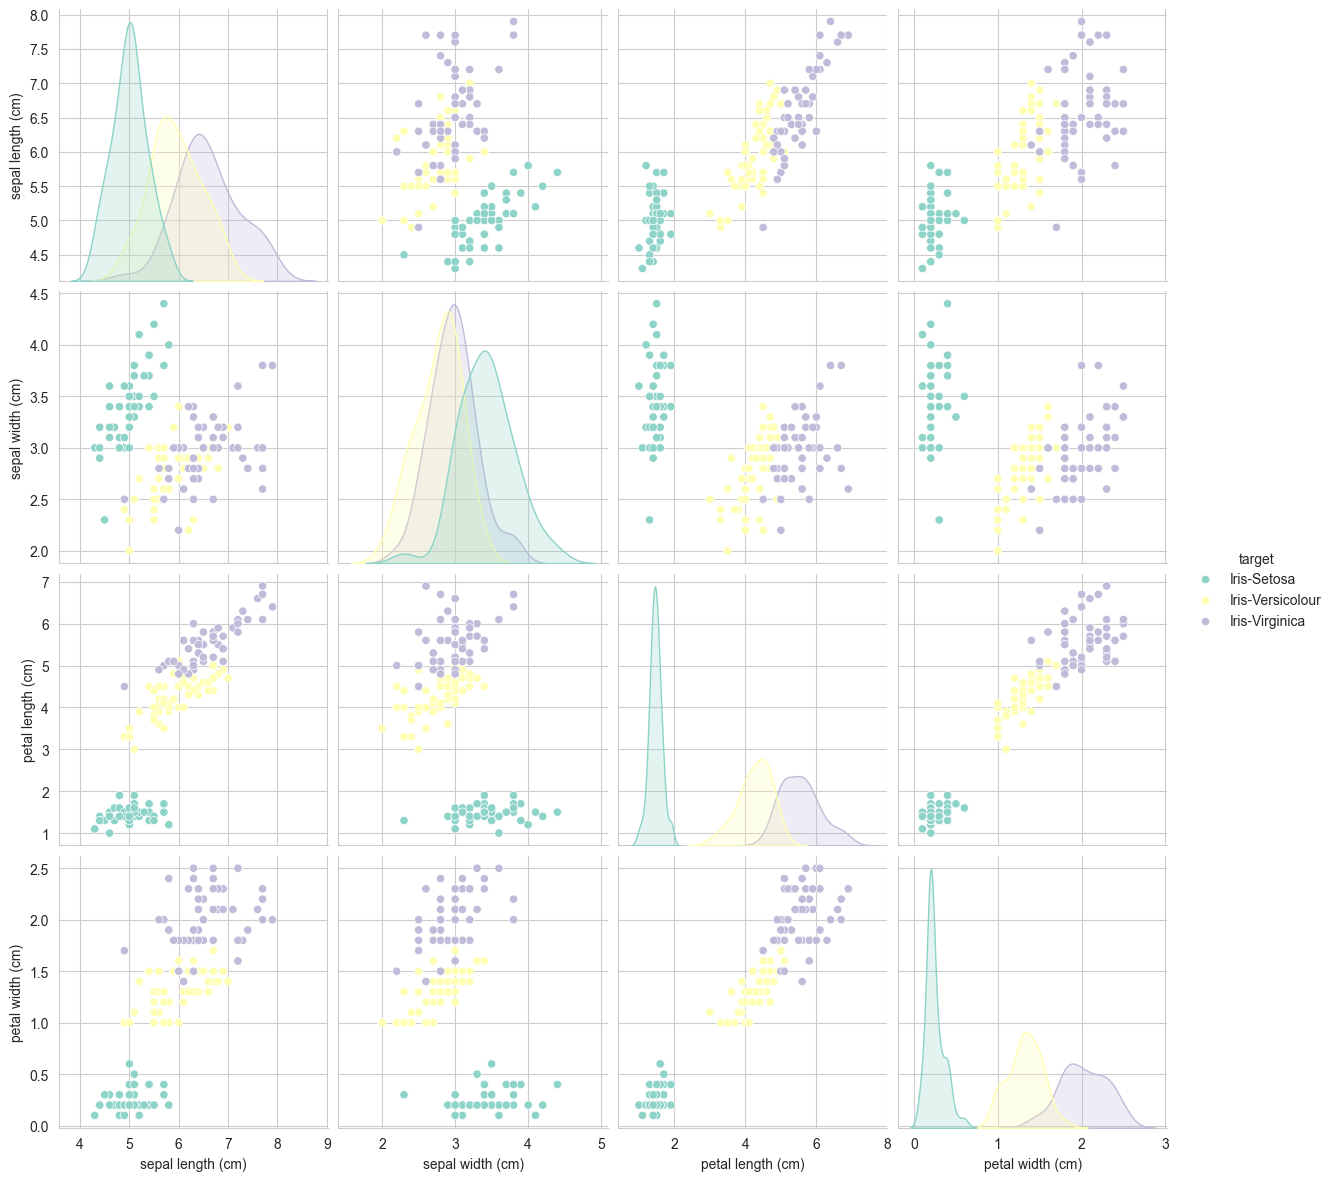

In [12]:
sns.pairplot(
    df,
    hue="target",
    height=3,
    diag_kind="kde",
)

In [13]:
df.groupby("target").skew()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
Iris-Setosa,0.120087,0.041167,0.106394,1.253861
Iris-Versicolour,0.105378,-0.362845,-0.606508,-0.031180
Iris-Virginica,0.118015,0.365949,0.549445,-0.129477


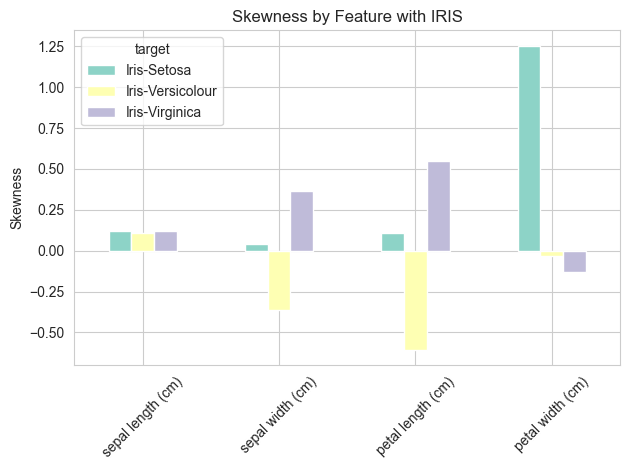

In [14]:
_df_skew = df.groupby("target").skew()

_df_skew.T.plot(kind="bar", grid=True)
plt.title("Skewness by Feature with IRIS")
plt.ylabel("Skewness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df.groupby("target").kurtosis()

AttributeError: 'DataFrameGroupBy' object has no attribute 'kurtosis'

In [16]:
df.groupby("target").apply(lambda group: group.iloc[:, :-1].kurtosis())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
Iris-Setosa,-0.252689,0.954703,1.021576,1.719130
Iris-Versicolour,-0.533010,-0.366237,0.047903,-0.410059
Iris-Virginica,0.032904,0.706071,-0.153779,-0.602264


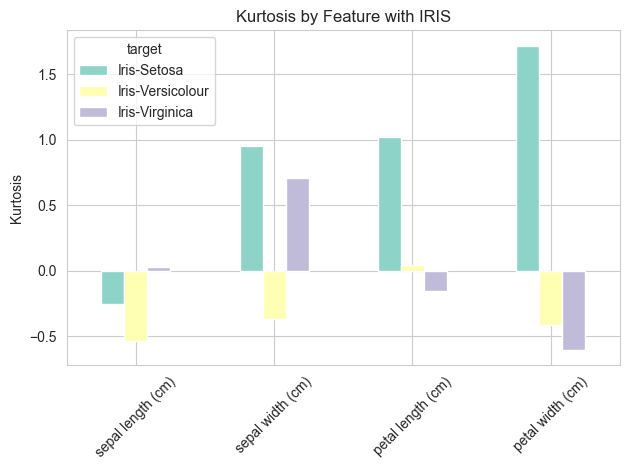

In [17]:
_df_kurt = df.groupby("target").apply(lambda group: group.iloc[:, :-1].kurtosis())

_df_kurt.T.plot(kind="bar", grid=True)
plt.title("Kurtosis by Feature with IRIS")
plt.ylabel("Kurtosis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# End of Documents